In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("German Credit Data.csv")
df.head(5)


,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


In [5]:
## Understanding about the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
inst_rate,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residing_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
num_credits,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
status,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


In [7]:
# check for the null values present in the data set
df.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
amount               0
savings_acc          0
present_emp_since    0
inst_rate            0
personal_status      0
residing_since       0
age                  0
inst_plans           0
num_credits          0
job                  0
status               0
dtype: int64

In [8]:
## understand the measure of central tendency for categorical values
df.describe(include=object).T

,count,unique,top,freq
checkin_acc,1000,4,A14,394
credit_history,1000,5,A32,530
savings_acc,1000,5,A61,603
present_emp_since,1000,5,A73,339
personal_status,1000,4,A93,548
inst_plans,1000,3,A143,814
job,1000,4,A173,630


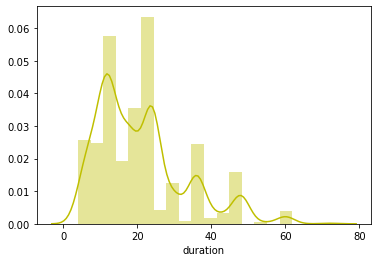

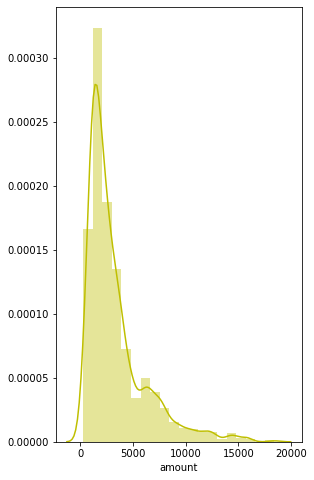

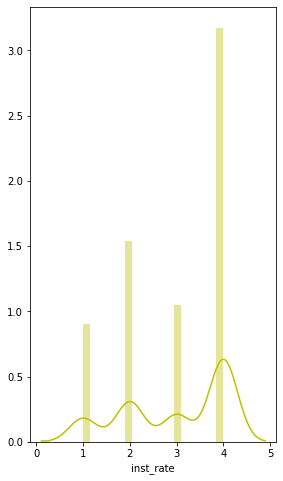

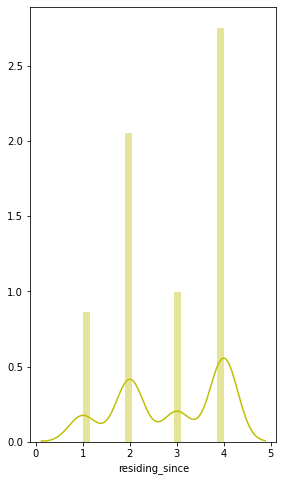

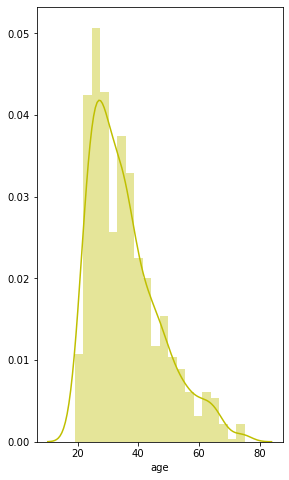

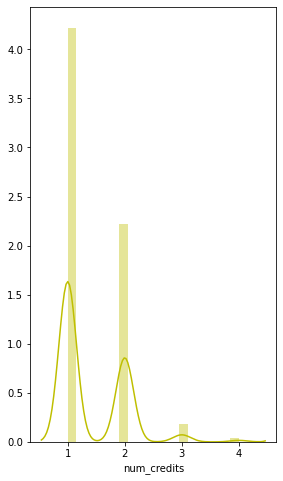

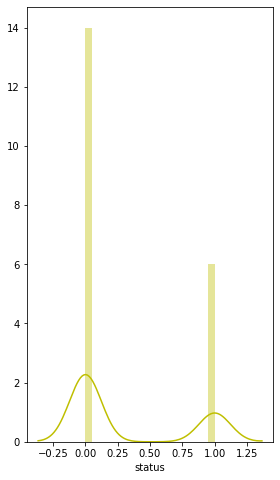

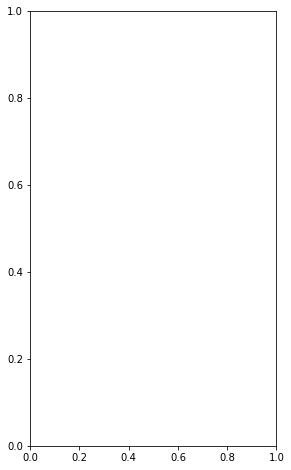

In [13]:
## let us understand the data distribution by ploting
for i in df.describe():
    sns.distplot(df[i],kde=True,bins=20,color="y")
    plt.figure(figsize=(15,6))
    plt.subplot(131)

### Based on the above graph we can understand that few of the columns are rightly skewed and few of the columns are normally distributed

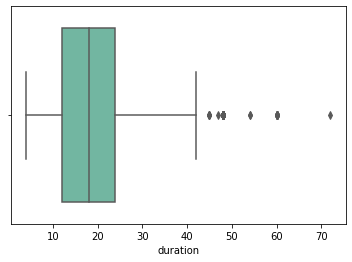

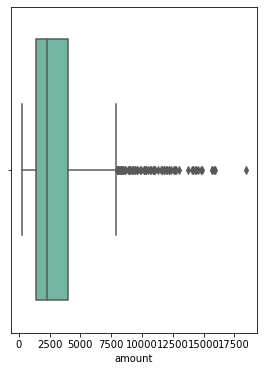

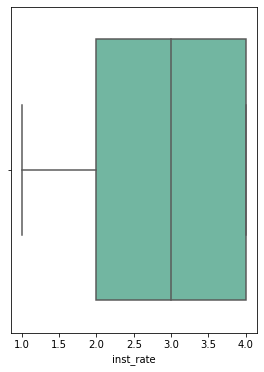

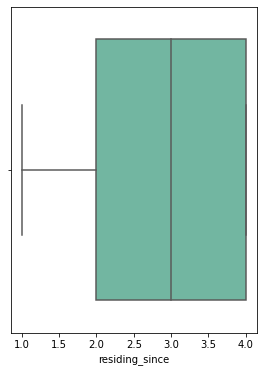

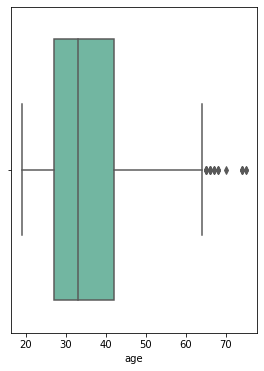

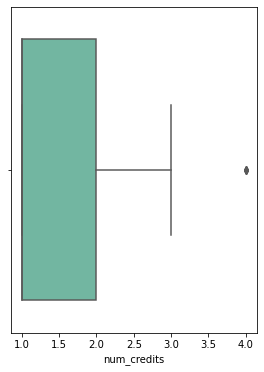

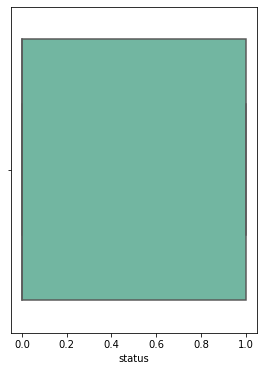

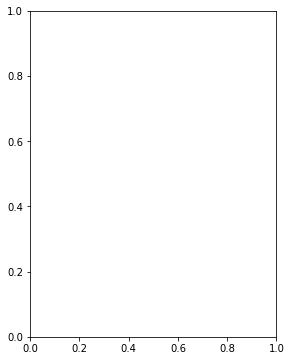

In [14]:
# let us check the outliers

for i in df.describe():
    sns.boxplot(df[i],palette="Set2")
    plt.figure(figsize=(15,6))
    plt.subplot(131)
    

In [17]:
# let us devide categorical columns and numerical columns

df_numerical=df.select_dtypes(include='int64')
df_numerical

,duration,amount,inst_rate,residing_since,age,num_credits,status
0,6,1169,4,4,67,2,0
1,48,5951,2,2,22,1,1
2,12,2096,2,3,49,1,0
3,42,7882,2,4,45,1,0
4,24,4870,3,4,53,2,1
...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0
996,30,3857,4,4,40,1,0
997,12,804,4,4,38,1,0
998,45,1845,4,4,23,1,1


In [19]:
df_categorical=df.select_dtypes(include='object')
df_categorical

,checkin_acc,credit_history,savings_acc,present_emp_since,personal_status,inst_plans,job
0,A11,A34,A65,A75,A93,A143,A173
1,A12,A32,A61,A73,A92,A143,A173
2,A14,A34,A61,A74,A93,A143,A172
3,A11,A32,A61,A74,A93,A143,A173
4,A11,A33,A61,A73,A93,A143,A173
...,...,...,...,...,...,...,...
995,A14,A32,A61,A74,A92,A143,A172
996,A11,A32,A61,A73,A91,A143,A174
997,A14,A32,A61,A75,A93,A143,A173
998,A11,A32,A61,A73,A93,A143,A173


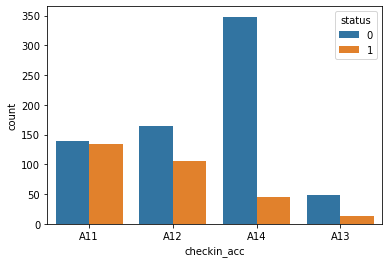

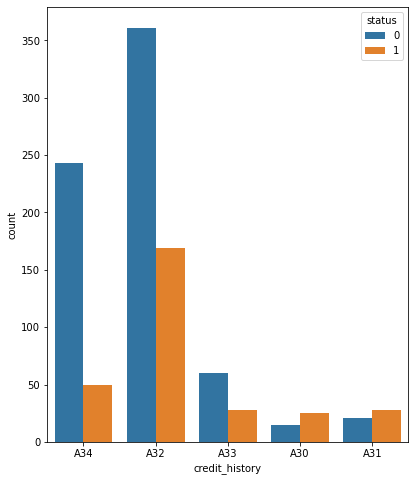

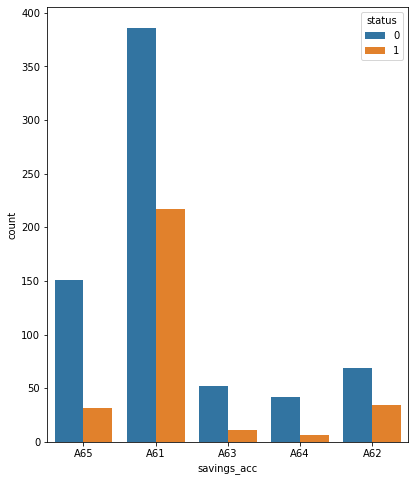

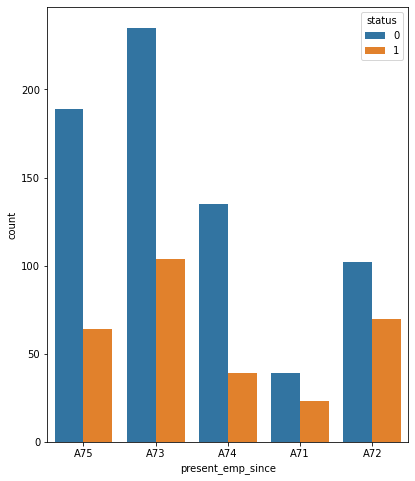

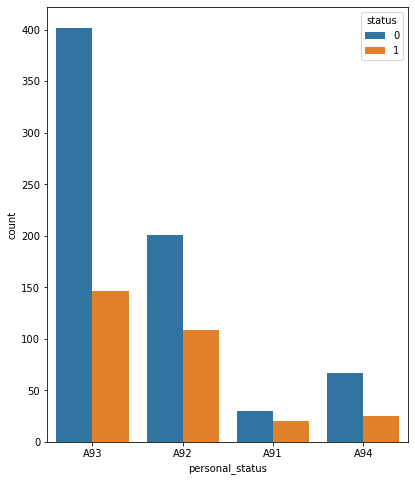

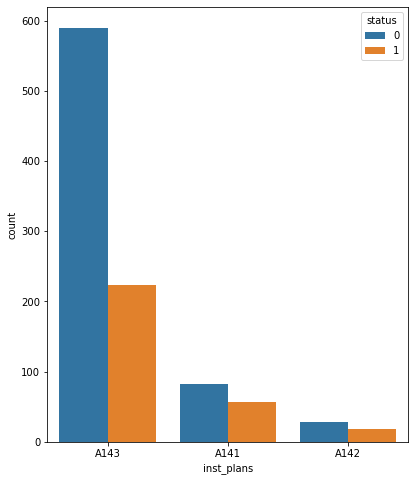

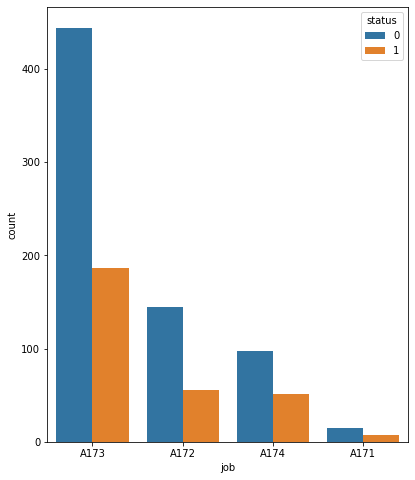

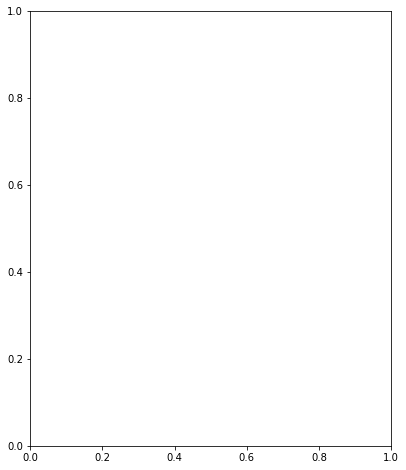

In [28]:
# let us understand the count plot
for i in df_categorical.columns:
    sns.countplot(x=i,hue='status',data=df)
    plt.figure(figsize=(22,8))
    plt.subplot(131)
    

In [29]:
x_dummies=pd.get_dummies(df_categorical,drop_first=True)

In [36]:
x=pd.concat([df_numerical,x_dummies],axis=1)
x.head(5)

,duration,amount,inst_rate,residing_since,age,num_credits,status,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,0,1,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [40]:
x=x.drop('status',axis=1)

In [42]:
y=df['status']

In [43]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: status, Length: 1000, dtype: int64

In [44]:
x

,duration,amount,inst_rate,residing_since,age,num_credits,checkin_acc_A12,checkin_acc_A13,checkin_acc_A14,credit_history_A31,...,present_emp_since_A74,present_emp_since_A75,personal_status_A92,personal_status_A93,personal_status_A94,inst_plans_A142,inst_plans_A143,job_A172,job_A173,job_A174
0,6,1169,4,4,67,2,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,12,2096,2,3,49,1,0,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,42,7882,2,4,45,1,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
4,24,4870,3,4,53,2,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,0,0,1,0,...,1,0,1,0,0,0,1,1,0,0
996,30,3857,4,4,40,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
997,12,804,4,4,38,1,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0
998,45,1845,4,4,23,1,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0


In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building

In [47]:
from sklearn.linear_model import LogisticRegression
lgm=LogisticRegression()

In [48]:
lgm.fit(x_train,y_train)

C:\Users\uvenkata\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
y_train_predict=lgm.predict(x_train)
print("the training prediction is:",y_train_predict)

the training prediction is: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0
 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0
 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0

In [50]:
y_test_predict=lgm.predict(x_test)
print("the testing prediction is:",y_test_predict)

the testing prediction is: [0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0]


### Model evaluation

In [58]:
from sklearn.metrics import accuracy_score,precision_score,plot_confusion_matrix

In [55]:
training_accuracy=accuracy_score(y_train,y_train_predict)
training_precision_score=precision_score(y_train,y_train_predict)
print(training_accuracy)
print("training precsion score is:",training_precision_score)

0.735
training precsion score is: 0.5783783783783784


In [57]:
testing_accuracy=accuracy_score(y_test,y_test_predict)
testing_precision_score=precision_score(y_test,y_test_predict)
print(testing_accuracy)
print("testing precision accuracy:",testing_precision_score)

0.765
testing precision accuracy: 0.6578947368421053


C:\Users\uvenkata\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


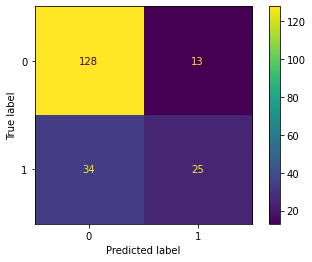

In [59]:
plot_confusion_matrix(lgm,x_test,y_test)
plt.show()

In [ ]:
/  